<a href="https://colab.research.google.com/github/pichuu12/Tensorflow/blob/main/HbA1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_excel('data.xlsx')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Splitting the data into features (X) and target (y)
X = df[['Converted in Hba1c(formula-2)']]
y = df['Apex Hospital Lab HbA1c']

# Splitting the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [30]:
y_test

9     5.0
11    5.8
0     5.1
13    7.0
Name: Apex Hospital Lab HbA1c, dtype: float64

In [31]:
y_pred

array([5.58634549, 5.98827451, 6.94142046, 6.61987724])

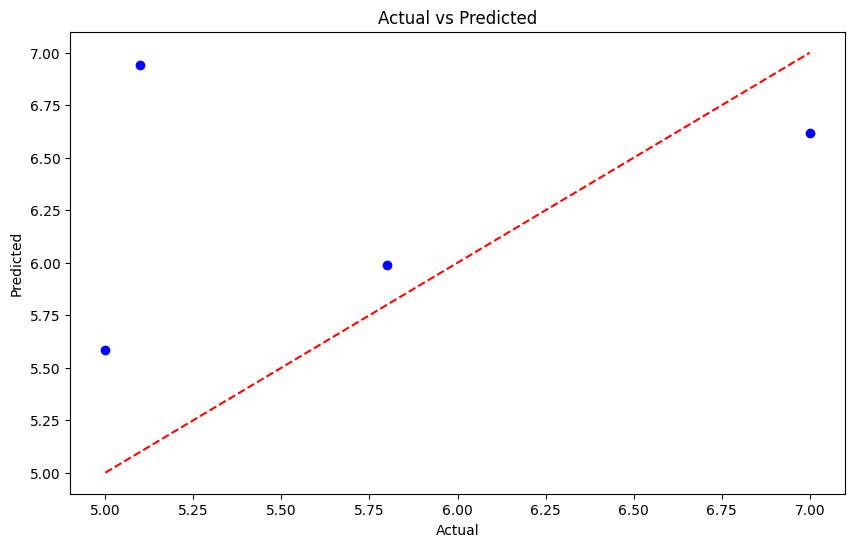

In [32]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [33]:
# Extracting the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (c):", intercept)


Slope (m): 0.5741843075532223
Intercept (c): 2.887679245385777


# Line Equation
**y = .57x + 2.88**

#Applying KNN on the same

Mean Squared Error (MSE) of KNN: 1.0325


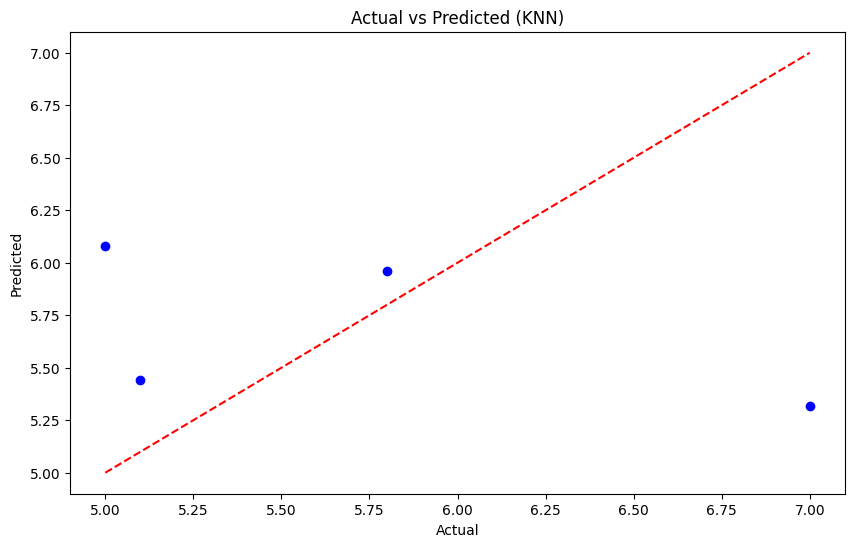

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting the data into features (X) and target (y)
X = df[['Converted in Hba1c(formula-2)']]
y = df['Apex Hospital Lab HbA1c']

# Splitting the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initializing the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Training the KNN regressor
knn_regressor.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_regressor.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (MSE) of KNN:", mse)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (KNN)')
plt.show()

### Compare KNN and Linear Regression

In [35]:
# Calculate MSE for linear regression
mse_linear_regression = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) of Linear Regression:", mse_linear_regression)

# Calculate MSE for KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (MSE) of KNN:", mse_knn)

Mean Squared Error (MSE) of Linear Regression: 0.9786427330038748
Mean Squared Error (MSE) of KNN: 1.0325


### Tweaking model

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)
best_knn_model = knn_grid_search.best_estimator_

# Re-train the linear regression model with scaled features
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions with the tuned models
y_pred_knn_tuned = best_knn_model.predict(X_test_scaled)
y_pred_lr_tuned = model.predict(X_test_scaled)

# Calculate MSE for the tuned models
mse_knn_tuned = mean_squared_error(y_test, y_pred_knn_tuned)
mse_lr_tuned = mean_squared_error(y_test, y_pred_lr_tuned)

print("Mean Squared Error (MSE) of Tuned KNN:", mse_knn_tuned)
print("Mean Squared Error (MSE) of Tuned Linear Regression:", mse_lr_tuned)

Mean Squared Error (MSE) of Tuned KNN: 1.0325
Mean Squared Error (MSE) of Tuned Linear Regression: 0.9786427330038748


In [37]:
## Since there are only limited data points, the model cant further be improved..